<a href="https://colab.research.google.com/github/arjunbangari/Facial-Expression-Recognition/blob/master/Face_Expression_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q --upgrade kaggle
from google.colab import files
files.upload()

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 94% 113M/121M [00:05<00:00, 21.9MB/s] 
100% 121M/121M [00:05<00:00, 24.4MB/s]


In [ ]:
! unzip face-expression-recognition-dataset.zip

In [12]:
from PIL import Image
import os

filename = "/content/images/train/angry/" + os.listdir("/content/images/train/angry/")[0]
img = Image.open(filename)
print(img.size)

(48, 48)


In [21]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape = (48, 48, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation = 'softmax')
])

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 64)       

In [32]:
training_dir = "/content/images/train"
validation_dir = "/content/images/validation"

train_datagen = ImageDataGenerator(
    rescale = 1.0/255, 
    rotation_range = 10, 
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator =  train_datagen.flow_from_directory(
    training_dir,
    target_size = (48, 48),
    class_mode = 'categorical',
    color_mode = 'grayscale',
    batch_size = 64
)

validation_datagen = ImageDataGenerator(
    rescale = 1.0/255
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (48, 48),
    class_mode = 'categorical',
    color_mode = 'grayscale',
    batch_size = 64
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [33]:
history = model.fit(
    train_generator,
    epochs = 50,
    validation_data = validation_generator
    )

Epoch 1/50
451/451 [==============================] - 16s 36ms/step - loss: 1.7747 - acc: 0.2720 - val_loss: 1.6845 - val_acc: 0.3316
Epoch 2/50
451/451 [==============================] - 16s 35ms/step - loss: 1.6174 - acc: 0.3667 - val_loss: 1.4973 - val_acc: 0.4285
Epoch 3/50
451/451 [==============================] - 16s 35ms/step - loss: 1.5136 - acc: 0.4113 - val_loss: 1.3998 - val_acc: 0.4585
Epoch 4/50
451/451 [==============================] - 16s 35ms/step - loss: 1.4307 - acc: 0.4468 - val_loss: 1.3334 - val_acc: 0.4832
Epoch 5/50
451/451 [==============================] - 16s 35ms/step - loss: 1.3781 - acc: 0.4664 - val_loss: 1.3179 - val_acc: 0.4929
Epoch 6/50
451/451 [==============================] - 16s 35ms/step - loss: 1.3398 - acc: 0.4840 - val_loss: 1.2513 - val_acc: 0.5246
Epoch 7/50
451/451 [==============================] - 16s 35ms/step - loss: 1.3127 - acc: 0.4956 - val_loss: 1.2315 - val_acc: 0.5378
Epoch 8/50
451/451 [==============================] - 16s 35ms

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


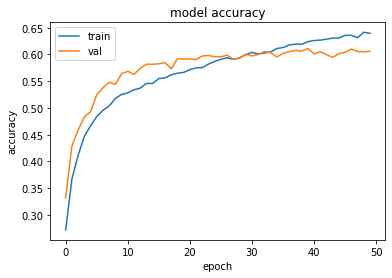

In [41]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

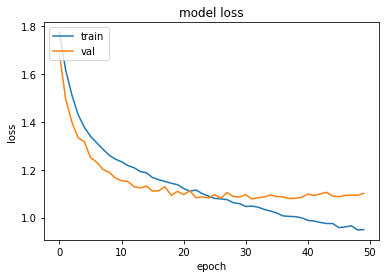

In [42]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()